In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression ,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
df=pd.read_csv("house_data.csv")
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15332,6140100095,20140520T000000,475000.0,4,1.75,1650,7775,1.0,0,0,...,7,1150,500,1950,0,98133,47.7150,-122.354,1390,7200
1046,5255710160,20150318T000000,465000.0,4,2.25,2210,8862,1.0,0,0,...,8,1270,940,1977,0,98011,47.7725,-122.198,2030,8862
4853,8712100605,20141028T000000,840000.0,4,2.25,2100,3671,1.5,0,0,...,8,1750,350,1929,0,98112,47.6359,-122.300,1800,4560
3793,4435000705,20140708T000000,160000.0,3,1.00,1350,8700,1.5,0,0,...,6,1350,0,1942,0,98188,47.4497,-122.289,1300,8700
16269,5297200089,20150415T000000,664000.0,2,1.75,1720,5785,1.0,0,0,...,6,860,860,1948,2002,98118,47.5554,-122.274,1680,5184
19351,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,0,...,10,4065,0,1987,0,98039,47.6209,-122.237,3070,18713
3206,4046600750,20150414T000000,375000.0,3,1.75,1370,19550,1.0,0,0,...,7,1370,0,1978,2006,98014,47.7002,-121.912,1430,17550
10800,809002030,20140911T000000,825000.0,2,2.00,1830,3600,1.0,0,0,...,7,1230,600,1926,0,98109,47.6359,-122.351,2020,3600
983,1862400132,20140916T000000,379000.0,2,1.00,930,5400,1.0,0,0,...,7,930,0,1952,0,98117,47.6971,-122.372,1050,5400
5322,6746700605,20150128T000000,530000.0,5,1.75,1570,3000,2.0,0,0,...,7,1570,0,1908,0,98105,47.6677,-122.316,1610,3000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 21613 entries, 0 to 21612

Data columns (total 21 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   id             21613 non-null  int64  

 1   date           21613 non-null  object 

 2   price          21613 non-null  float64

 3   bedrooms       21613 non-null  int64  

 4   bathrooms      21613 non-null  float64

 5   sqft_living    21613 non-null  int64  

 6   sqft_lot       21613 non-null  int64  

 7   floors         21613 non-null  float64

 8   waterfront     21613 non-null  int64  

 9   view           21613 non-null  int64  

 10  condition      21613 non-null  int64  

 11  grade          21613 non-null  int64  

 12  sqft_above     21613 non-null  int64  

 13  sqft_basement  21613 non-null  int64  

 14  yr_built       21613 non-null  int64  

 15  yr_renovated   21613 non-null  int64  

 16  zipcode        21613 non-null  int64  

 17  lat            21613 non-nul

In [74]:
df.shape

(21613, 21)

In [75]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [76]:
df.duplicated().sum()

0

In [77]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [78]:
df.drop(columns=["id","date","zipcode","long","lat"],inplace=True)
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
2803,478000.0,3,1.00,1280,2580,1.5,0,0,3,8,1280,0,1910,2014,1410,3150
1489,532000.0,3,2.25,1910,35015,1.0,0,0,4,8,1430,480,1977,0,2340,36680
2259,390000.0,3,1.50,1240,8410,1.0,0,0,5,6,1240,0,1948,0,1630,8410
19010,810000.0,6,2.75,3970,9500,1.0,0,0,4,10,2180,1790,1970,0,2490,9775
10168,605000.0,4,1.75,2250,10108,1.0,0,0,4,8,2250,0,1967,0,2050,9750


In [79]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [80]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248


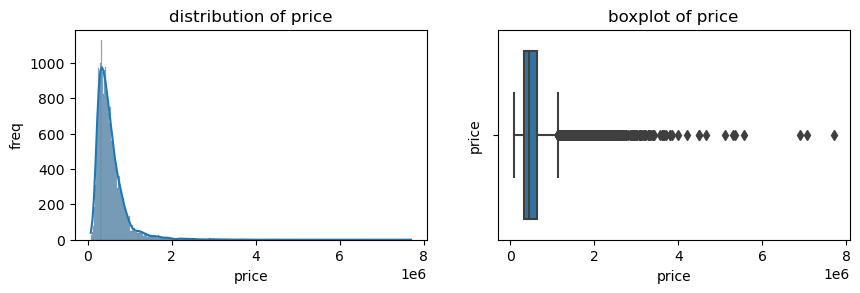

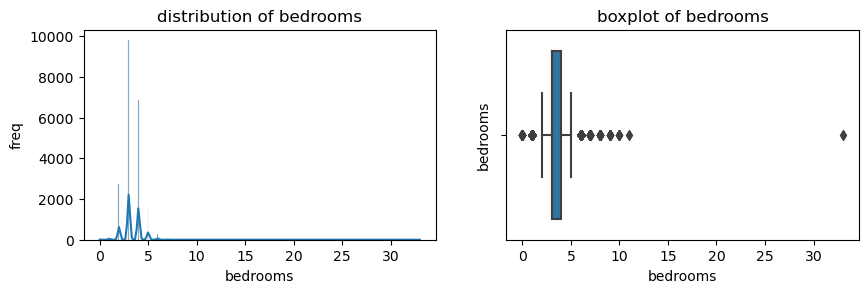

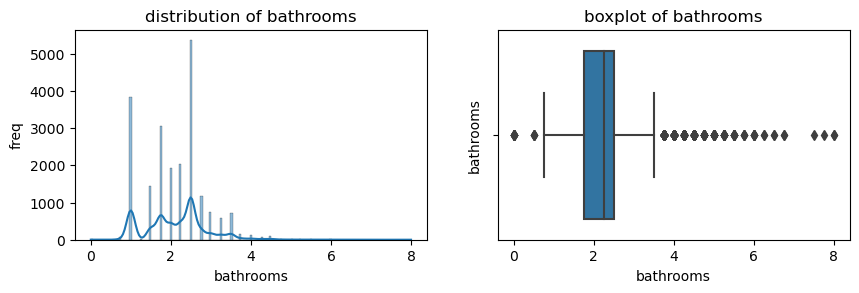

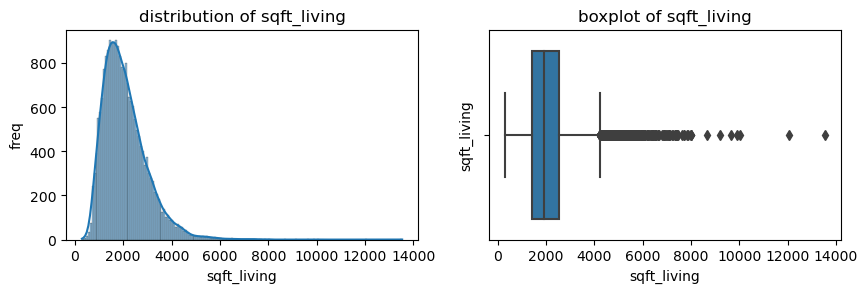

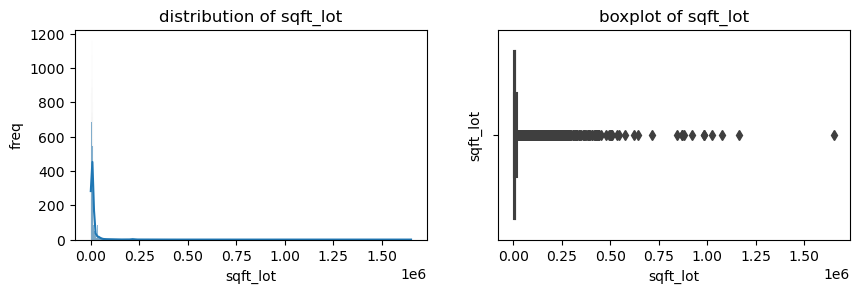

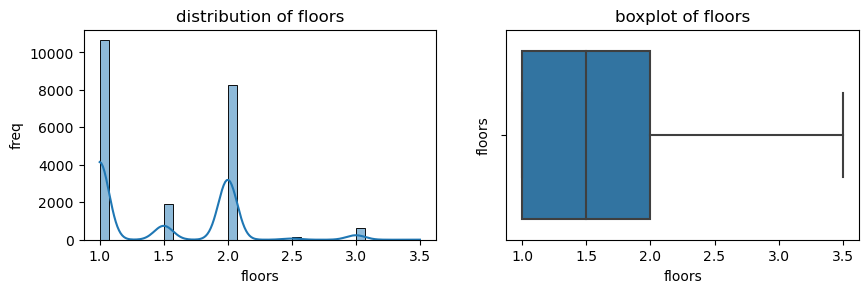

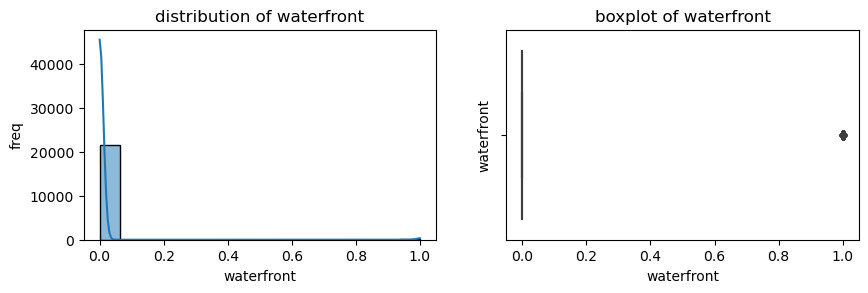

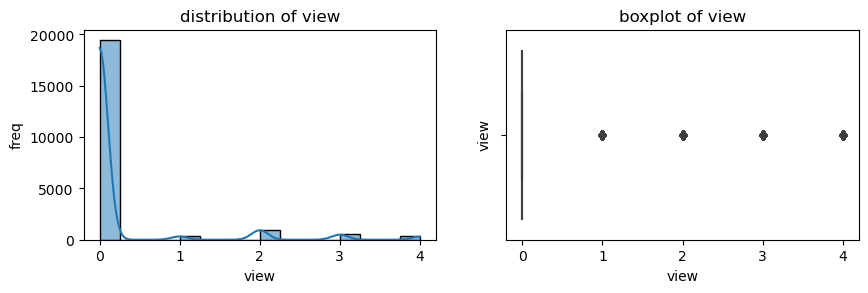

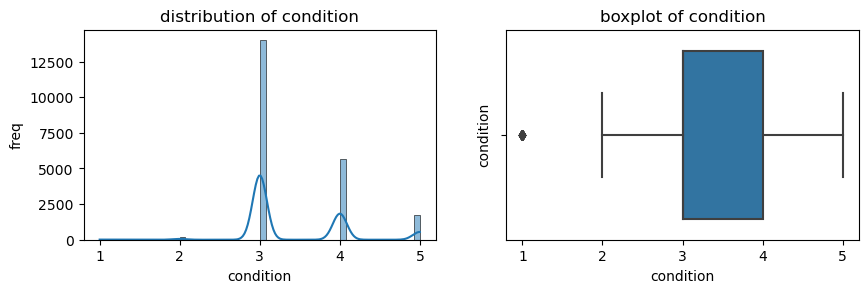

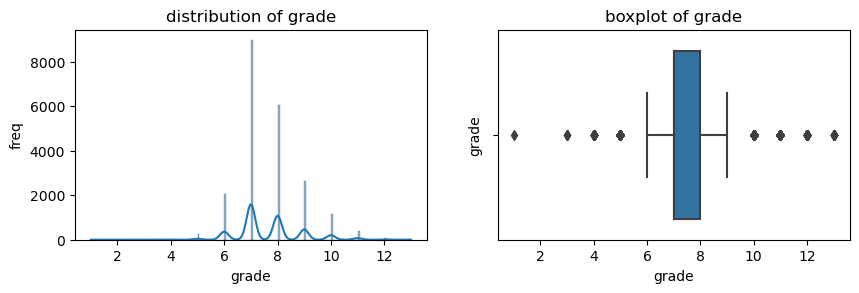

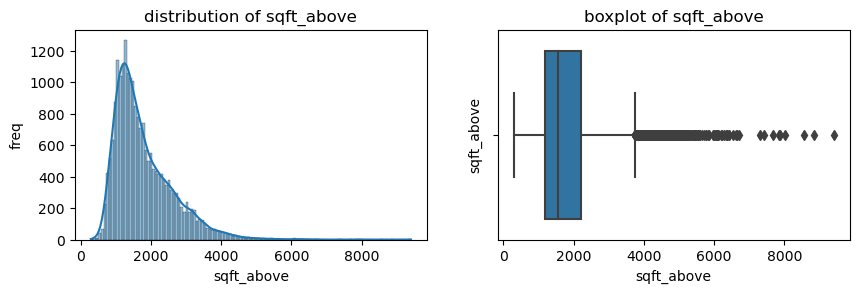

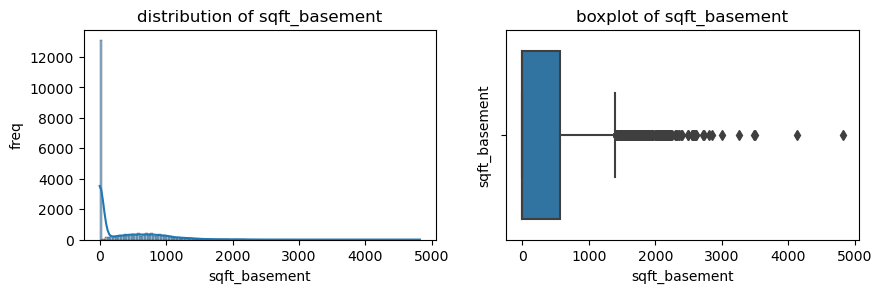

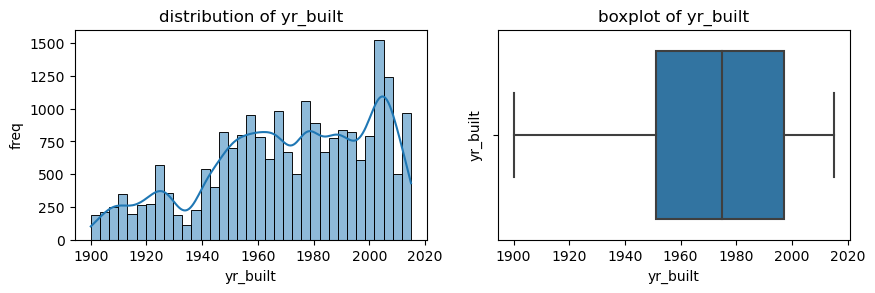

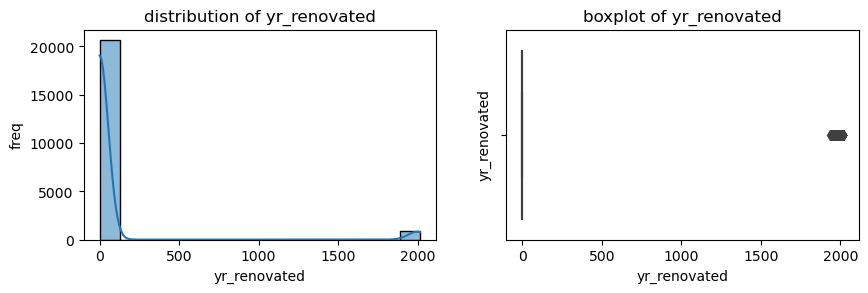

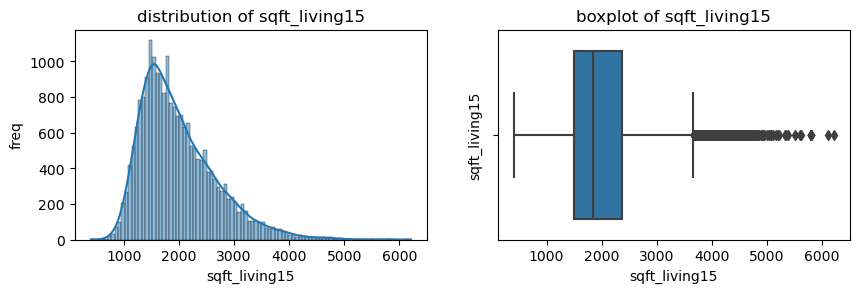

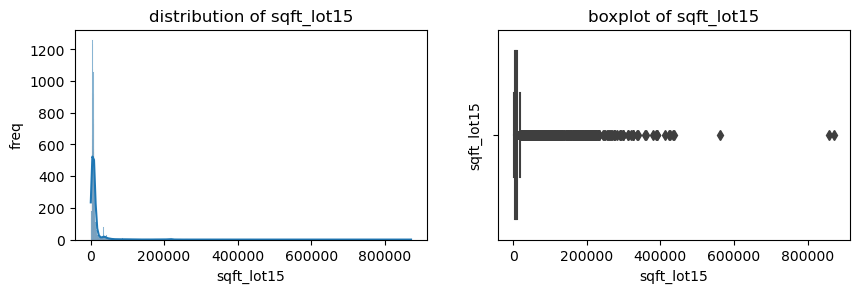

In [81]:
for column in df.columns:
    if df[column].dtype!="object":
        plt.figure(figsize=(10,6))
        plt.subplot(2,2,1)
        sns.histplot(data=df,x=column,kde=True)
        plt.ylabel("freq")
        plt.xlabel(column)
        plt.title(f"distribution of {column}")
        plt.subplot(2,2,2)
        sns.boxplot(data=df,x=column)
        plt.ylabel(column)
        plt.title(f"boxplot of {column}")
        plt.show()

In [87]:
df[df.price==df.price.max()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
7252,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,3940,8800


In [88]:
df[df.price==df.price.min()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
1149,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,1160,42882


In [89]:
df[(df.bedrooms==1)&(df.floors==1)][["price"]]

,price
154,350000.0
264,369900.0
350,299000.0
465,80000.0
648,157000.0
...,...
20017,290000.0
20853,325000.0
21043,375000.0
21240,525000.0


In [90]:
df.yr_built.value_counts(ascending=True)

1934     21
1935     24
1902     27
1901     29
1933     30
       ... 
2003    422
2004    433
2005    450
2006    454
2014    559
Name: yr_built, Length: 116, dtype: int64

In [91]:
len(df[df.yr_built==2014])

559

In [92]:
x=df.drop("price",axis=1)
y=df.price

In [93]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41,shuffle=True)

In [95]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(17290, 15)

(17290, 1)

(4323, 15)

(4323, 1)


## linear_model

### LinearRegression


In [96]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [97]:
y_pred=model.predict(x_test)

In [98]:
model.score(x_train,y_train)

0.6524752025909735

In [99]:
model.score(x_test,y_test)

0.6546972078288893

In [100]:
mean_squared_error(y_test,y_pred)

0.42059935504394363

In [101]:
r2_score(y_test,y_pred)

0.6546972078288893

### RIDGE

In [102]:
model2=Ridge(alpha=0.001)
model2.fit(x_train,y_train)

Ridge(alpha=0.001)

In [103]:
model2.score(x_train,y_train)

0.6524752025909715

In [104]:
model2.score(x_test,y_test)

0.6546972057643365

In [105]:
y_pr=model2.predict(x_test)

In [106]:
mean_squared_error(y_pr,y_test)

0.42059935755869177

In [107]:
r2_score(y_pr,y_test)

0.36935257788626685

### LASSO

In [108]:
model3=Lasso(alpha=0.001)
model3.fit(x_train,y_train)

Lasso(alpha=0.001)

In [109]:
y_p=model3.predict(x_test)

In [110]:
model3.score(x_train,y_train)

0.6524537466589589

In [111]:
model3.score(x_test,y_test)

0.6543445431744684

In [112]:
mean_squared_error(y_test,y_p)

0.42102892158542327

In [113]:
r2_score(y_test,y_p)

0.6543445431744684

## DecisionTreeRegressor

In [114]:
MODEL=DecisionTreeRegressor()
MODEL.fit(x_train,y_train)

DecisionTreeRegressor()

In [115]:
MODEL.score(x_train,y_train)

0.9993201759237974

In [116]:
Ypred=MODEL.predict(x_test)

In [117]:
MODEL.score(x_test,y_test)

0.6013463410622609

In [118]:
r2_score(y_test,Ypred)

0.6013463410622609

In [119]:
mean_squared_error(y_test,Ypred)

0.48558388648080414

In [120]:
MODEL.feature_importances_

array([0.00900806, 0.02063531, 0.23571831, 0.04260005, 0.00489054,
       0.02052677, 0.02478118, 0.00606585, 0.39441773, 0.02863275,
       0.01563836, 0.0881208 , 0.00314126, 0.06663623, 0.03918681])

In [121]:
cross_val_score(DecisionTreeRegressor(),x,y,cv=3)

array([0.53904817, 0.50508814, 0.487814  ])

## RandomForestRegressor

In [122]:
reg=RandomForestRegressor(n_estimators=400)
reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=400)

In [123]:
reg.score(x_train,y_train)

0.9643352550390513

In [124]:
reg.score(x_test,y_test)

0.7743838769586079

In [125]:
ytst_pr=reg.predict(x_test)

In [126]:
r2_score(y_test,ytst_pr)

0.7743838769586079

In [127]:
mean_squared_error(y_test,ytst_pr)

0.27481386768428145

In [128]:
cross_val_score(RandomForestRegressor(n_estimators=100),x,y,cv=3)

array([0.75562053, 0.75522669, 0.72207397])

## SVR

In [130]:
m=SVR(C=10,gamma="auto")
m.fit(x_train,y_train)
m.score(x_train,y_train)

0.8412384381799978

In [131]:
m.score(x_test,y_test)

0.6796754936962517

In [132]:
cross_val_score(SVR(C=10,gamma="auto"),x,y,cv=3)

array([0.68325455, 0.66925729, 0.7034788 ])